In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Load a dataset
df = pd.read_csv('diabetes.csv.csv')



In [67]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [68]:
# Display first few rows
print(df.head())




   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [72]:
# Summary statistics
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [73]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [74]:
df.shape

(768, 9)

In [75]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [76]:
df.duplicated().sum()

0

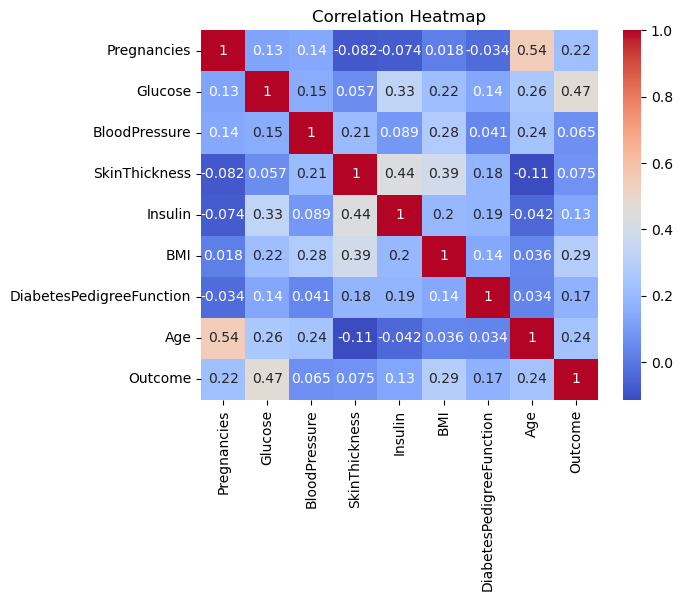

In [77]:
 #Correlation Analysis Understanding Relationships Between Variables Measures how closely two variables move together.
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [78]:
# Calculate the mean of a specific variable
mean_value = df["Age"].mean()
print("Mean:", mean_value)



Mean: 33.240885416666664


In [79]:
# Group by a category variable and sum the values of another feature
grouped_data = df.groupby('Glucose').agg({'BMI': 'sum'})
print(grouped_data)


           BMI
Glucose       
0        164.4
44        25.0
56        24.2
57        54.5
61        34.4
...        ...
195       56.0
196      113.8
197      127.8
198       41.3
199       42.9

[136 rows x 1 columns]


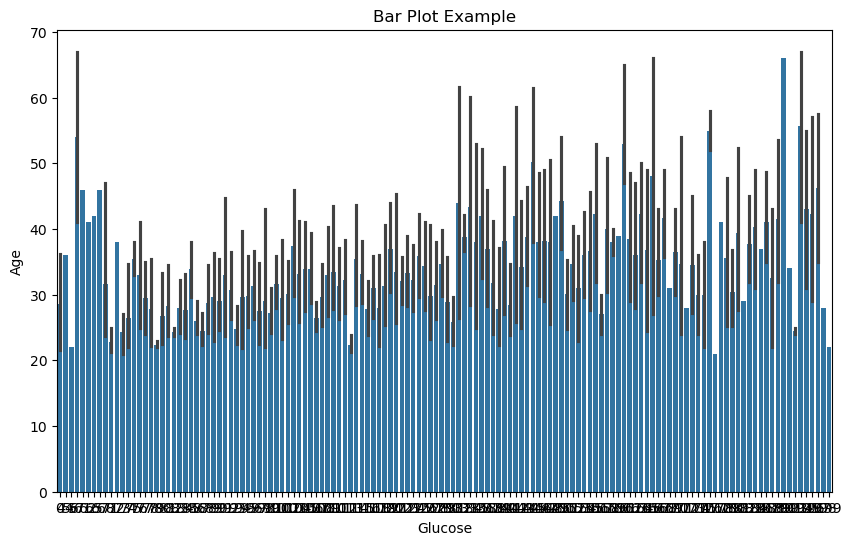

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Glucose', y='Age')
plt.title('Bar Plot Example')
plt.show()


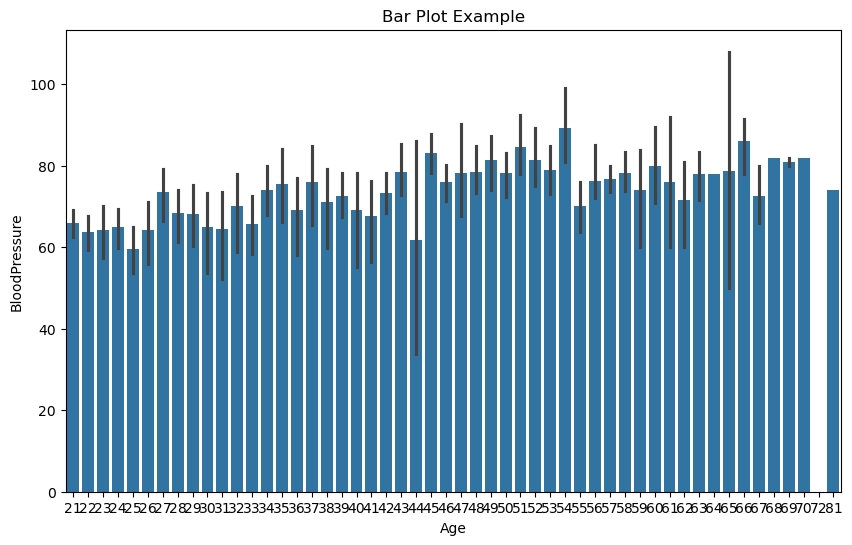

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age', y='BloodPressure')
plt.title('Bar Plot Example')
plt.show()


In [81]:
from scipy import stats
t_stat, p_value = stats.ttest_ind(df['Age'], df['BloodPressure'])
print("T-statistic:", t_stat, "P-value:", p_value)


T-statistic: -43.884256858672465 P-value: 3.2299259167868434e-273


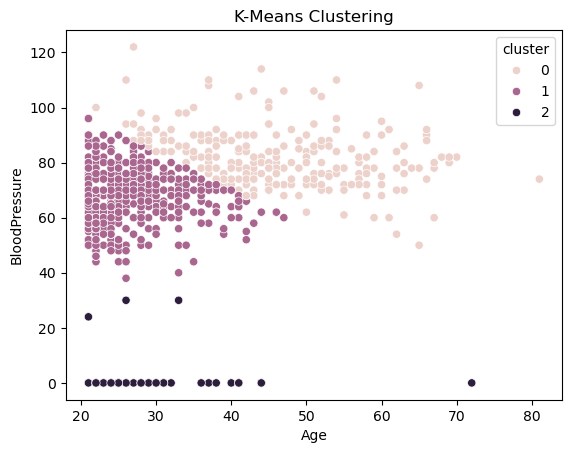

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['Age', 'BloodPressure']])
sns.scatterplot(data=df, x='Age', y='BloodPressure', hue='cluster')
plt.title('K-Means Clustering')
plt.show()


In [82]:
from sklearn.linear_model import LinearRegression
X = df[['Age', 'BloodPressure']]
y = df['BloodPressure']
model = LinearRegression().fit(X, y)
predictions = model.predict(X)


In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'BloodPressure']])


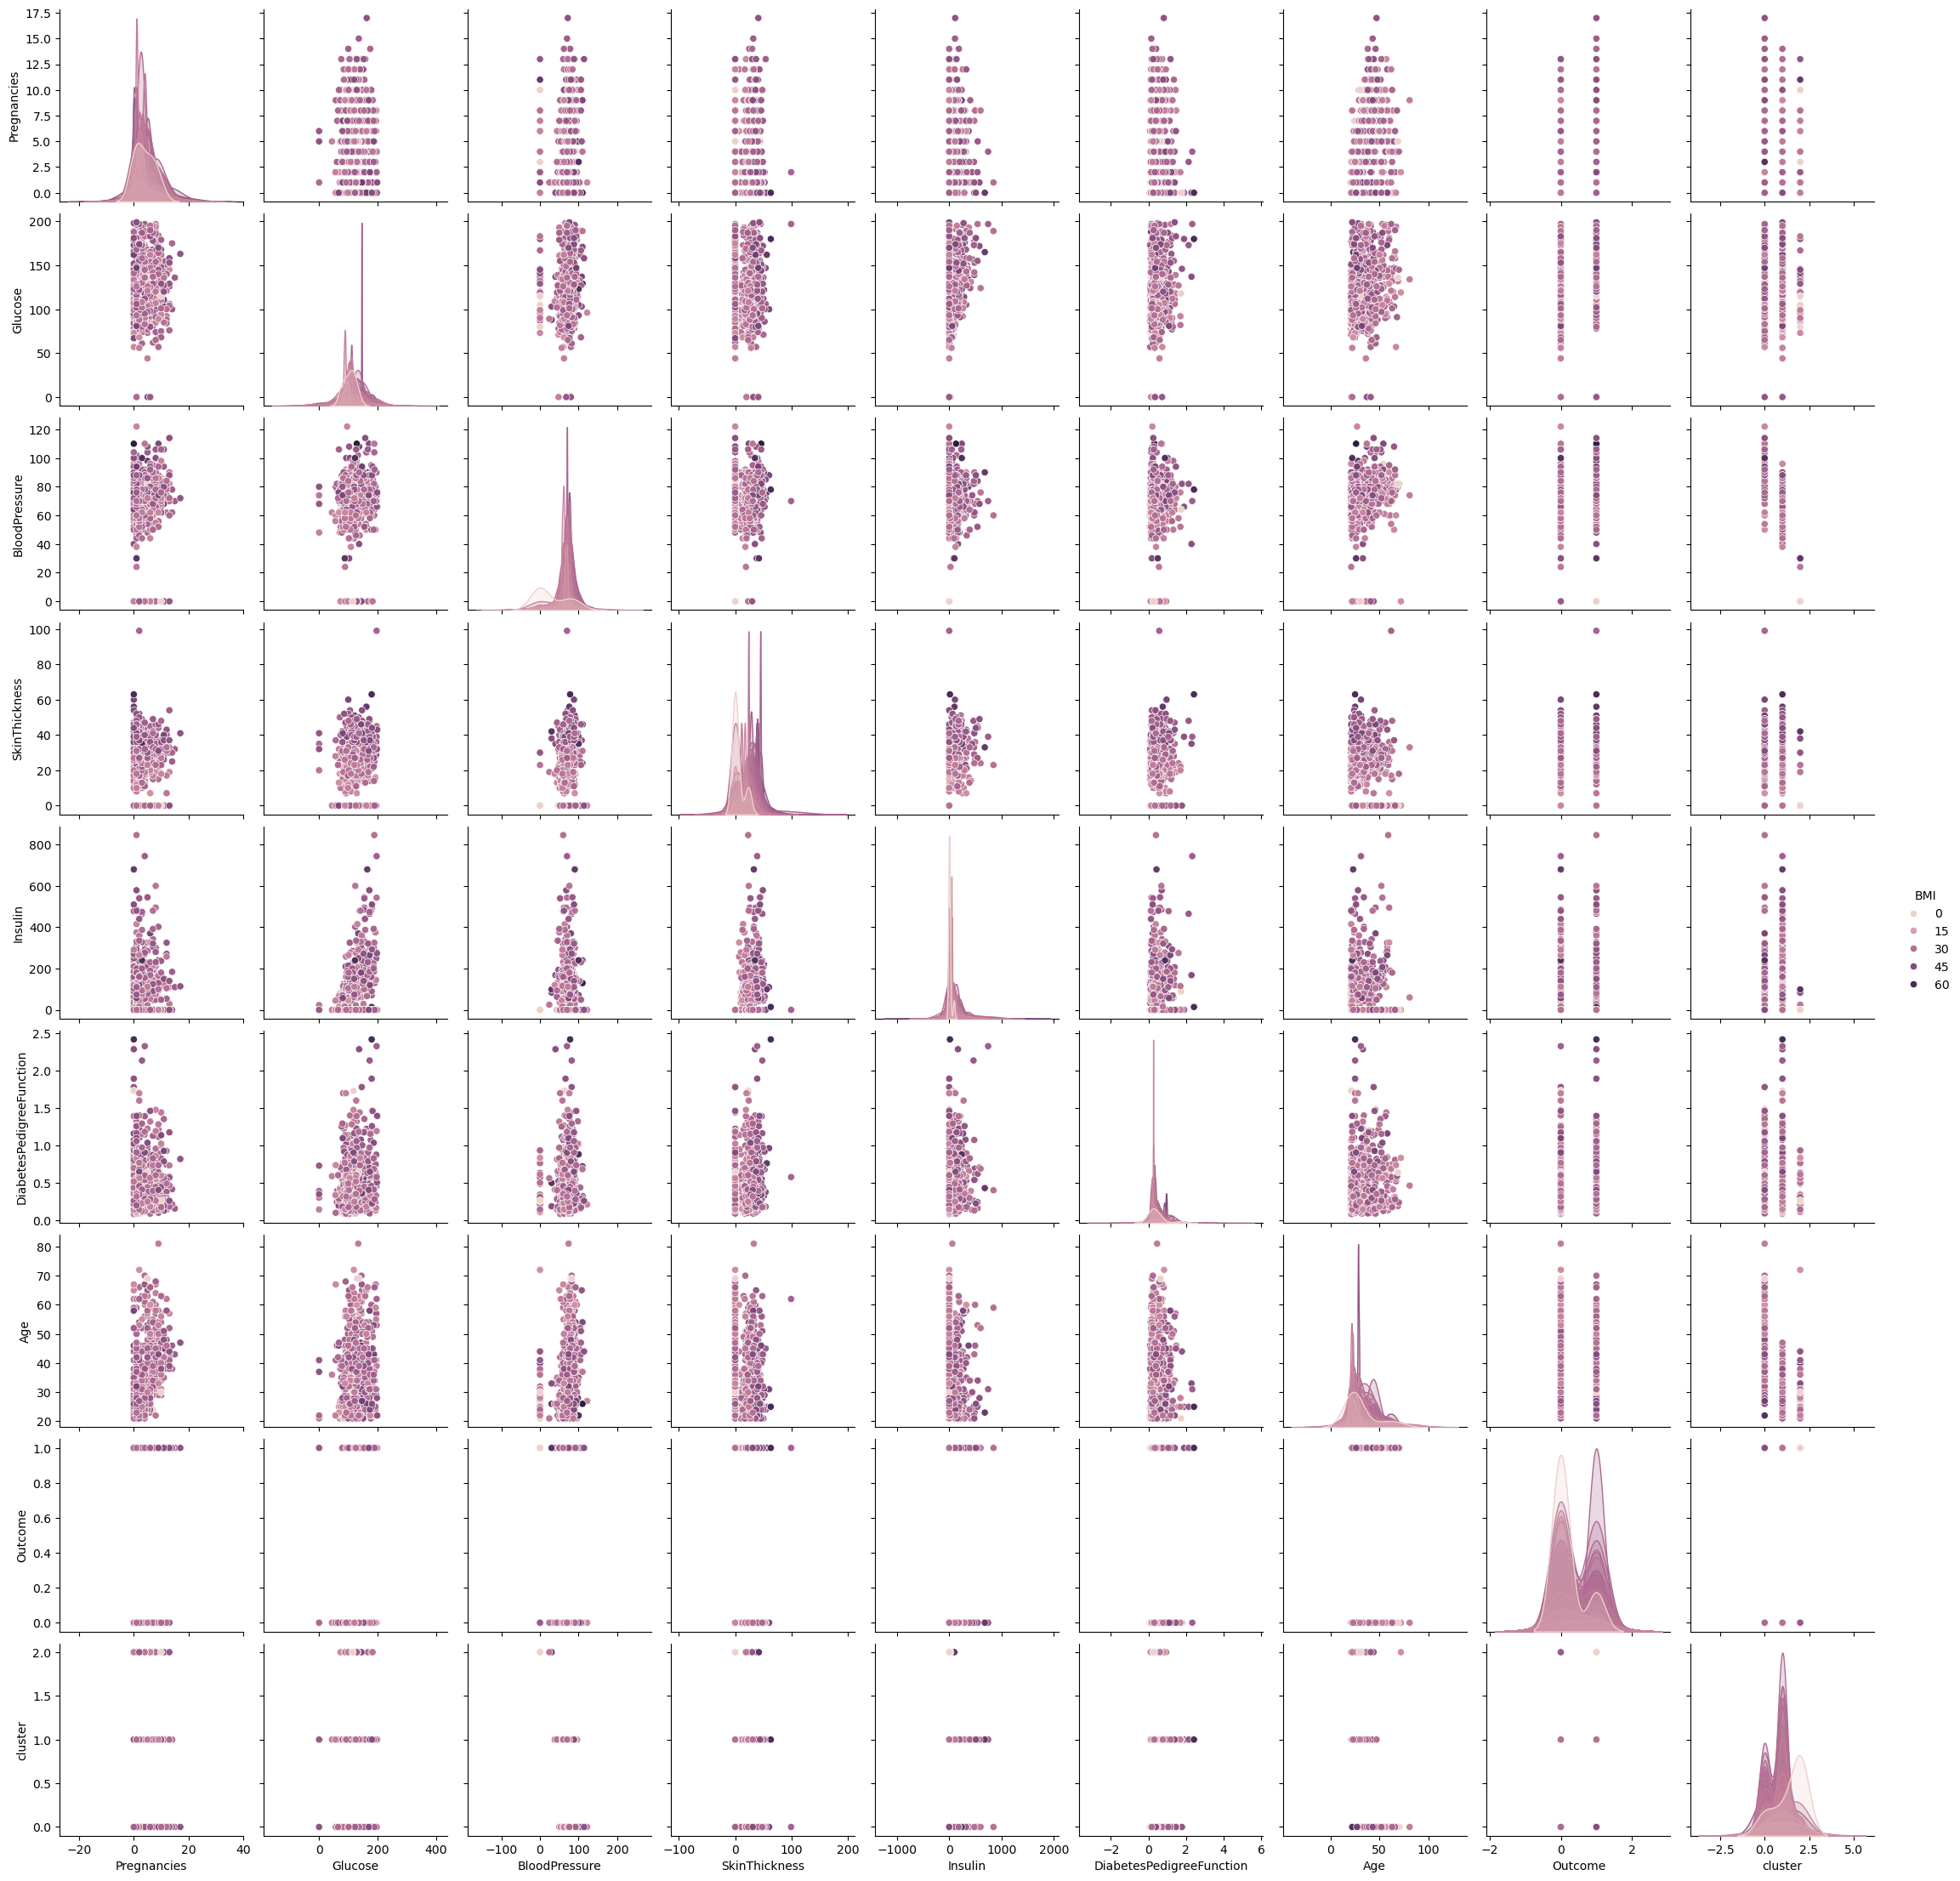

In [60]:
#pairplot
sns.pairplot(df, hue='BMI')
plt.show()


In [62]:
# analysing by group
grouped = df.groupby('Age').mean()
print(grouped)


     Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Age                                                                      
21      1.079365  108.317460      65.936508      19.349206   73.634921   
22      1.555556  108.208333      63.722222      20.486111   74.486111   
23      1.578947  111.578947      64.315789      22.368421  118.026316   
24      1.891304  117.891304      64.956522      25.934783   88.021739   
25      1.770833  110.083333      59.666667      23.958333   82.895833   
26      1.969697  118.212121      64.181818      23.666667   90.878788   
27      2.562500  115.281250      73.500000      18.375000   63.125000   
28      3.028571  119.914286      68.314286      23.628571   94.600000   
29      3.310345  127.379310      68.241379      21.000000   88.793103   
30      3.619048  122.285714      64.857143      18.904762   82.666667   
31      3.875000  126.958333      64.375000      20.000000  111.166667   
32      4.437500  116.312500      70.0

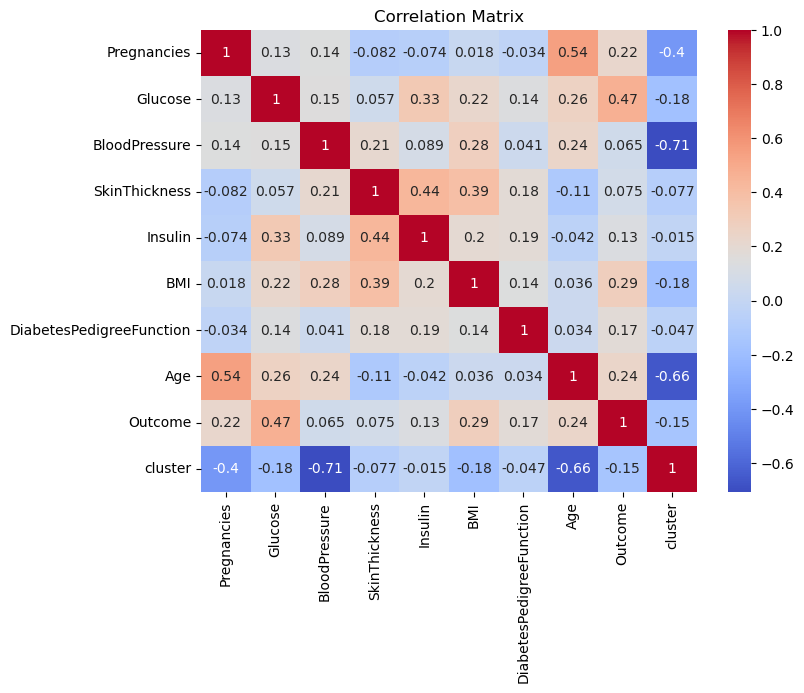

In [63]:
# correlation matrix
correlation = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error